# Step 1. Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('SocialMediaSentiment.csv', encoding='MacRoman')

In [2]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None


In [3]:
# Show the first few rows of the dataset
print(df.head())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! üí™       ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

In [4]:
# Display summary statistics
print(df.describe())

       Unnamed: 0.1  Unnamed: 0    Retweets       Likes         Year  \
count    732.000000  732.000000  732.000000  732.000000   732.000000   
mean     366.464481  369.740437   21.508197   42.901639  2020.471311   
std      211.513936  212.428936    7.061286   14.089848     2.802285   
min        0.000000    0.000000    5.000000   10.000000  2010.000000   
25%      183.750000  185.750000   17.750000   34.750000  2019.000000   
50%      366.500000  370.500000   22.000000   43.000000  2021.000000   
75%      549.250000  553.250000   25.000000   50.000000  2023.000000   
max      732.000000  736.000000   40.000000   80.000000  2023.000000   

            Month         Day        Hour  
count  732.000000  732.000000  732.000000  
mean     6.122951   15.497268   15.521858  
std      3.411763    8.474553    4.113414  
min      1.000000    1.000000    0.000000  
25%      3.000000    9.000000   13.000000  
50%      6.000000   15.000000   16.000000  
75%      9.000000   22.000000   19.000000  

In [5]:
# Count the number of posts per platform
platform_counts = df['Platform'].value_counts()
print('Number of posts per platform:')
print(platform_counts)

Number of posts per platform:
 Instagram     258
 Facebook      231
 Twitter       128
 Twitter       115
Name: Platform, dtype: int64


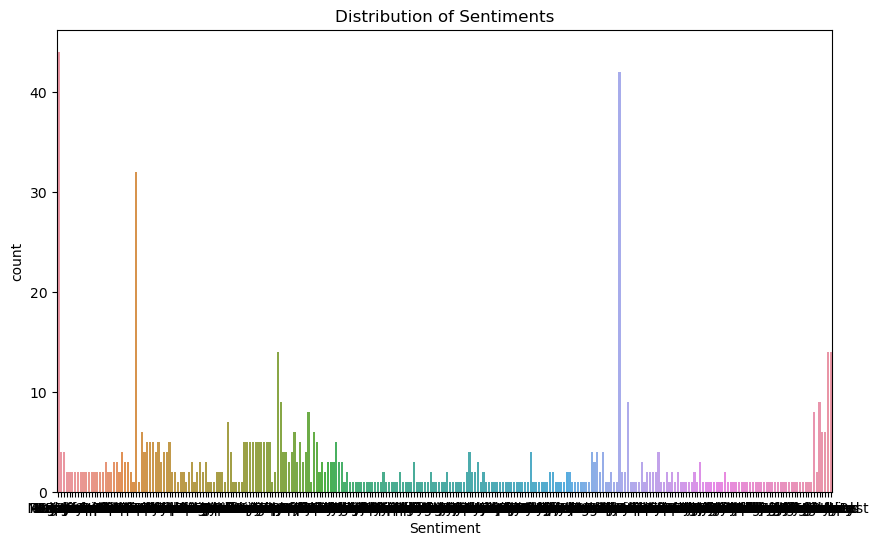

Data exploration completed.


In [6]:
# Visualize the distribution of sentiments
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

print('Data exploration completed.')

# Step 2. Sentiment Analysis

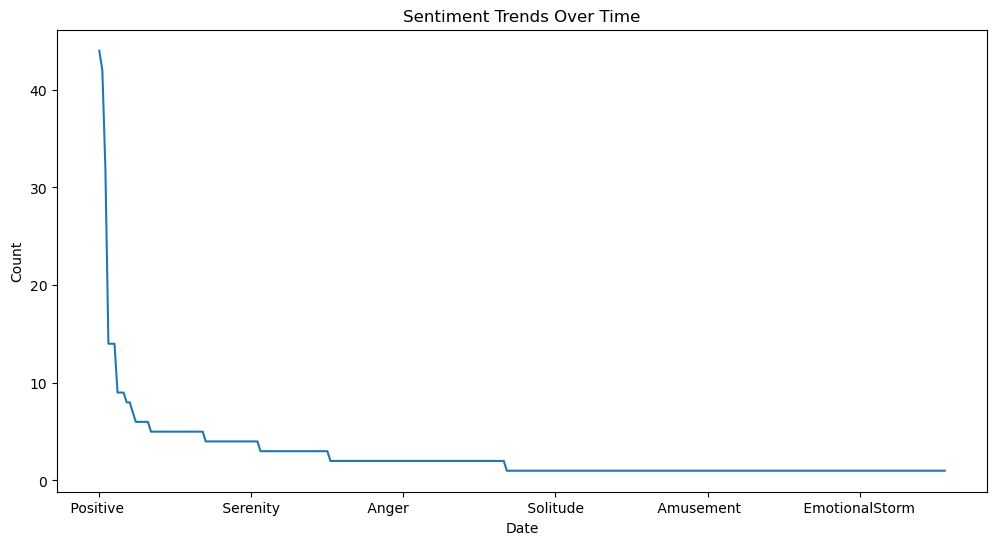

In [7]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sentiment over time
plt.figure(figsize=(12, 6))
df['Sentiment'].value_counts().plot(kind='line')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

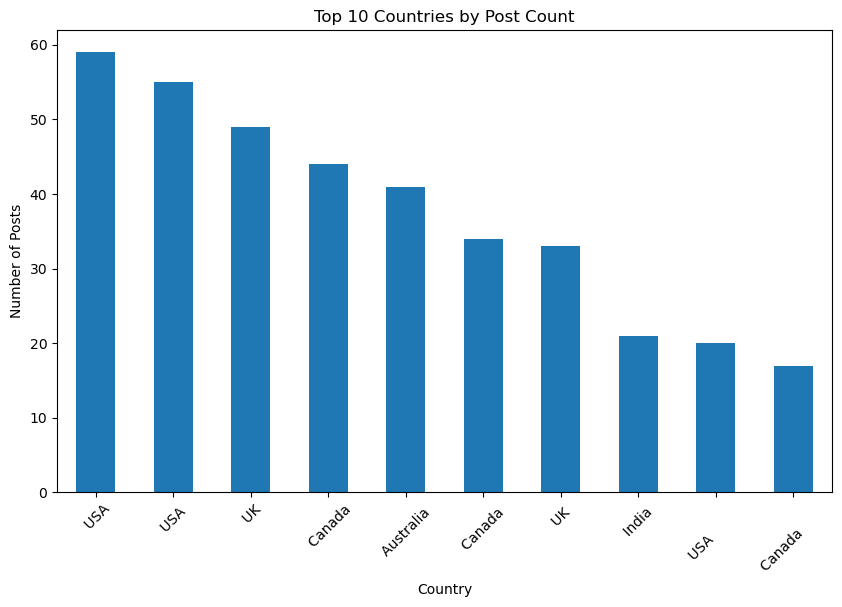

In [8]:
# Top 10 countries by post count
top_countries = df['Country'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Post Count')
plt.xlabel('Country')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()

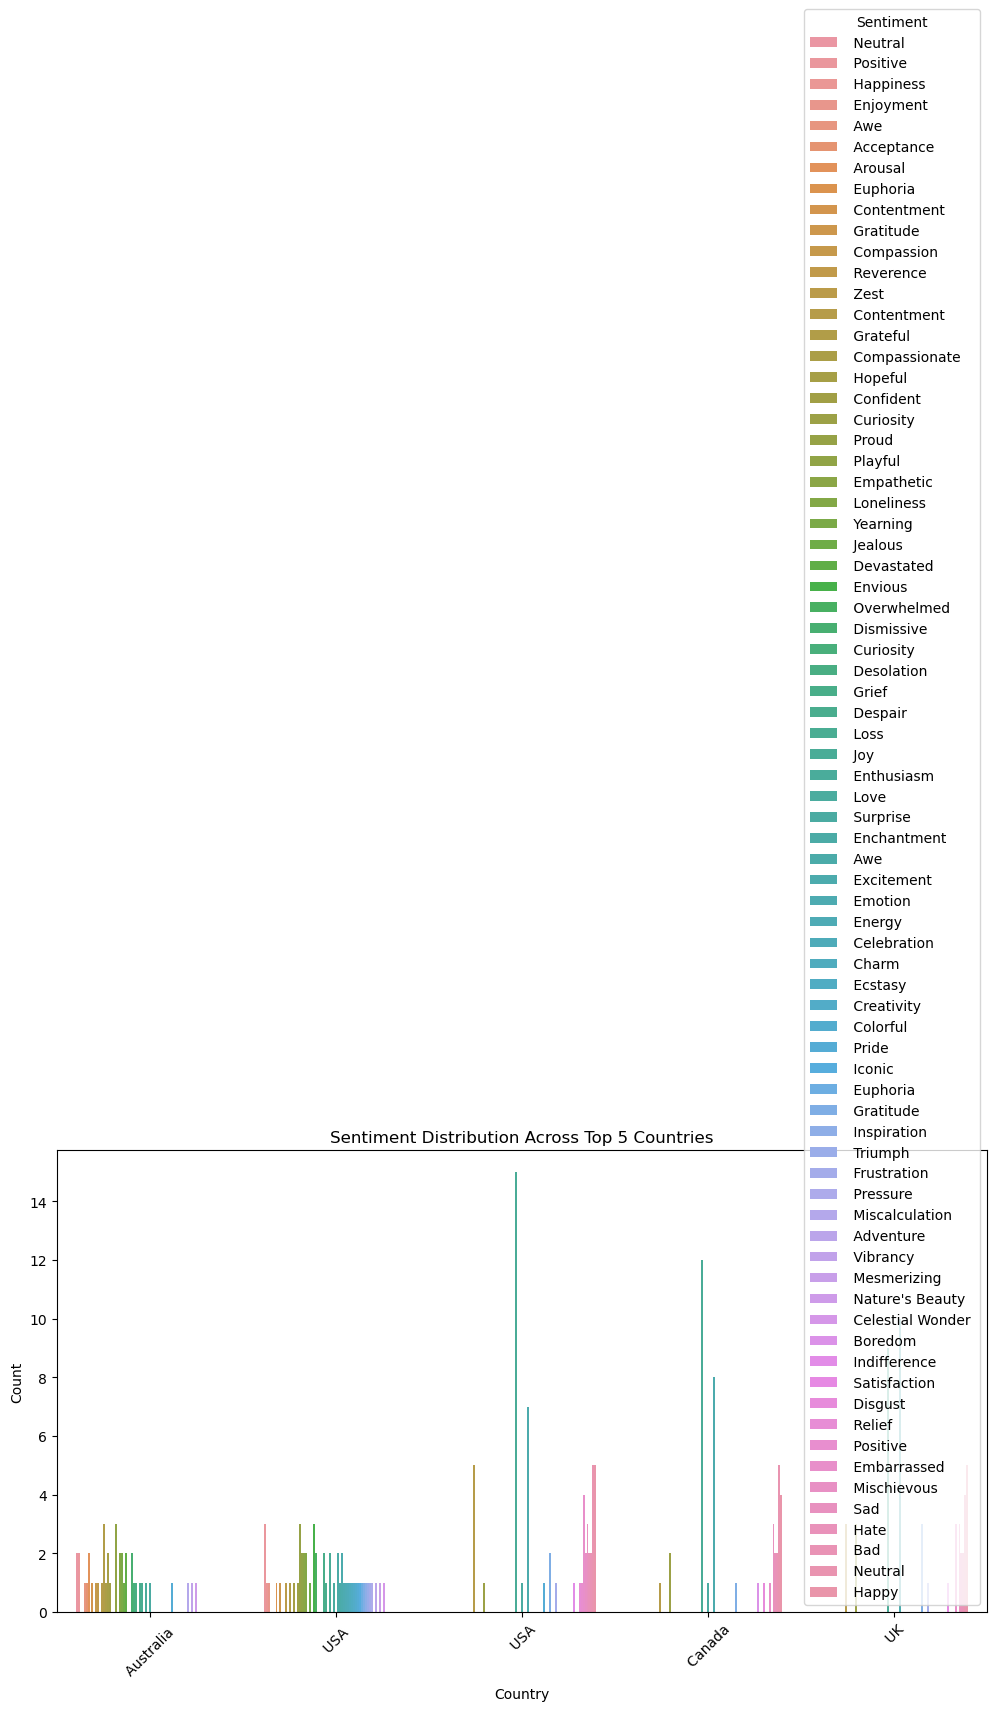

Sentiment analysis over time and by country completed.


In [9]:
# Sentiment distribution across top 5 countries
top_5_countries = df['Country'].value_counts().nlargest(5).index
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', hue='Sentiment', data=df[df['Country'].isin(top_5_countries)])
plt.title('Sentiment Distribution Across Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

print('Sentiment analysis over time and by country completed.')

# Step 3. Sentiment Trends and Insights

# Step 4. Engagement Analysis

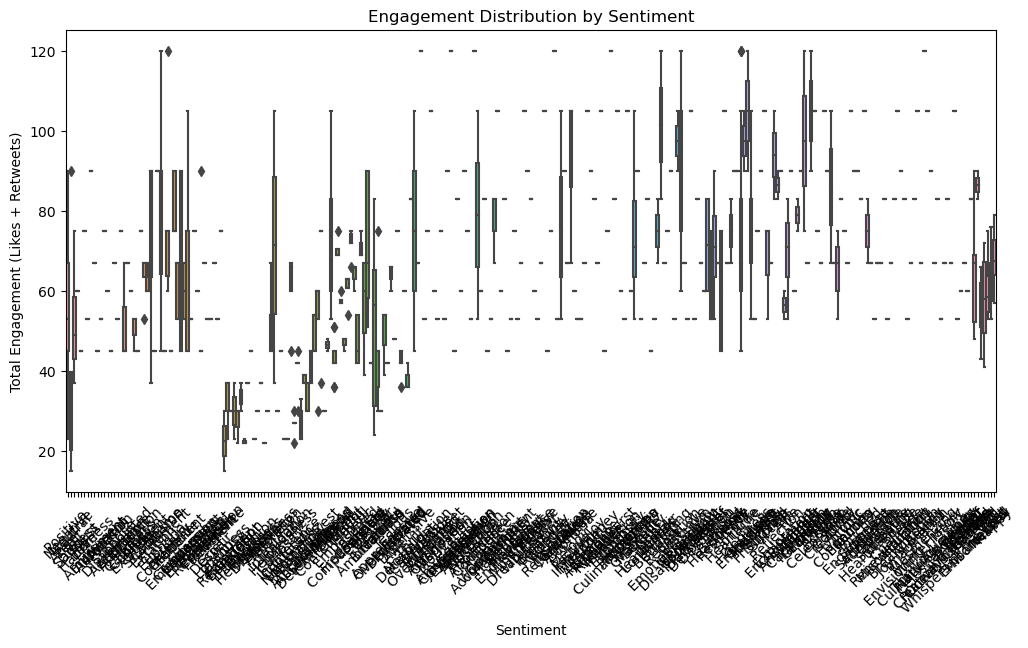

In [10]:
# Calculate total engagement
df['Total_Engagement'] = df['Likes'] + df['Retweets']

# Engagement by Sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sentiment', y='Total_Engagement', data=df)
plt.title('Engagement Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Total Engagement (Likes + Retweets)')
plt.xticks(rotation=45)
plt.show()

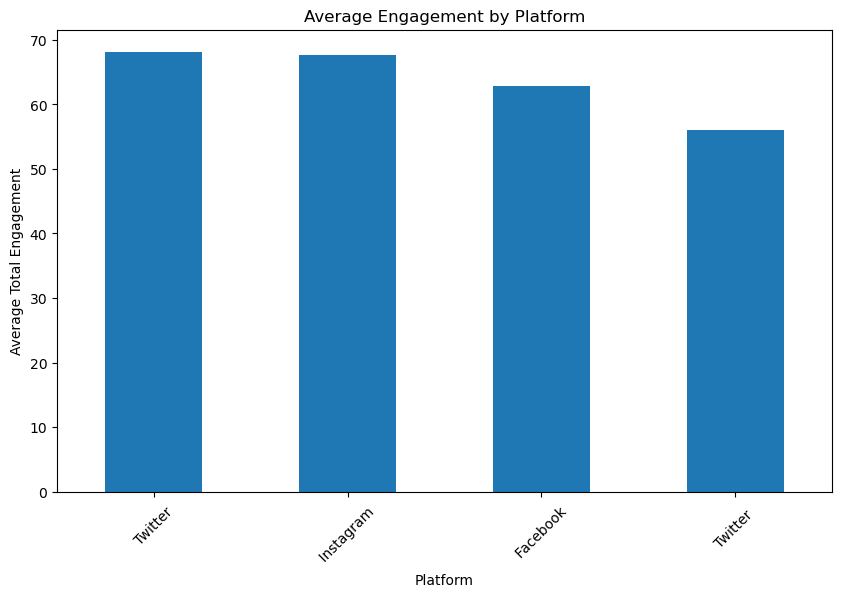

In [11]:
# Average Engagement by Platform
avg_engagement = df.groupby('Platform')['Total_Engagement'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_engagement.plot(kind='bar')
plt.title('Average Engagement by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Total Engagement')
plt.xticks(rotation=45)
plt.show()

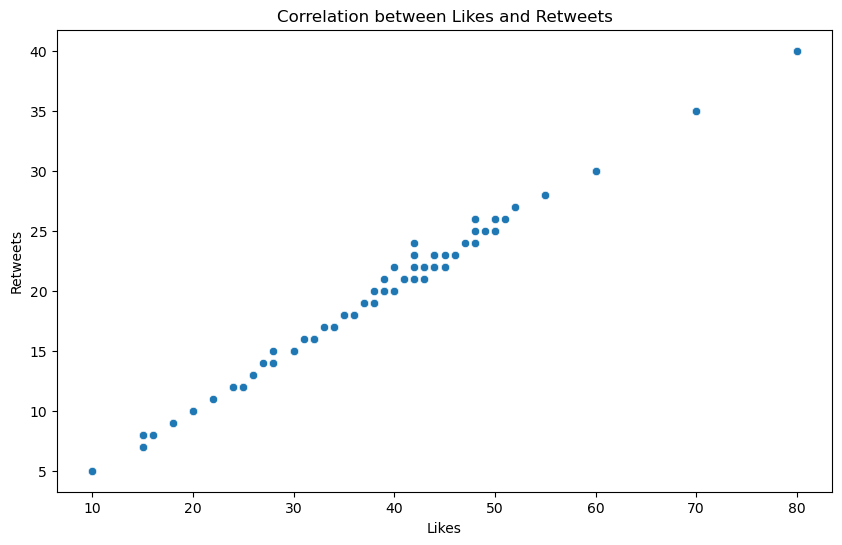

Engagement analysis completed.


In [12]:
# Correlation between Likes and Retweets
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Likes', y='Retweets', data=df)
plt.title('Correlation between Likes and Retweets')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.show()

print('Engagement analysis completed.')